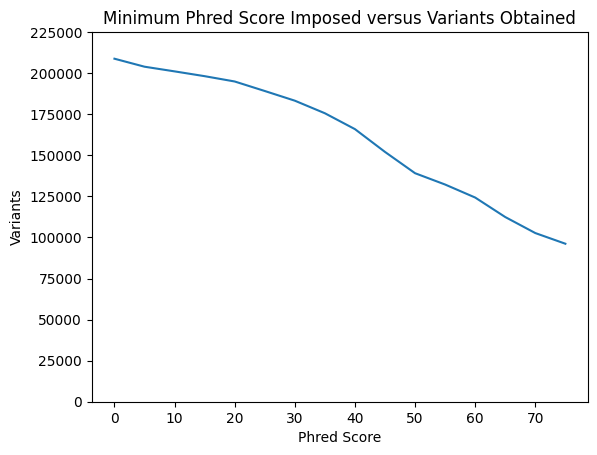

In [12]:
import matplotlib.pyplot as plt

labels = [0, 5, 
          10, 15, 
          20, 25, 
          30, 35, 
          40, 45, 
          50, 55, 
          60, 65, 
          70, 75]

variants = [212211, 207343, 
            204500, 201580, 
            198343, 192552, 
            186661, 179006, 
            169344, 155465, 
            142512, 135613, 
            127691, 115829, 
            106073, 99578]

fig, ax = plt.subplots()

plt.title("Minimum Phred Score Imposed versus Variants Obtained")
plt.xlabel("Phred Score")
plt.ylabel("Variants")

plt.ylim(0, 225000)

ax.plot(labels, [i-3395 for i in variants])

plt.show()

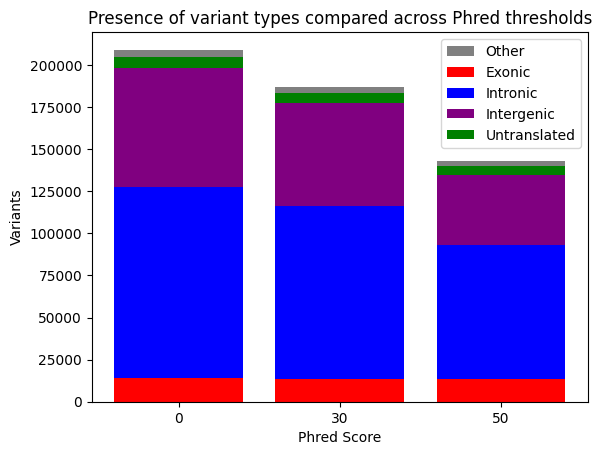

In [36]:
import matplotlib.pyplot as plt

labels = ["0", "30", "50"]


variants = [209106, 186935, 142725]
intronic = [113437, 102287, 79975]
intergenic = [70612, 61157, 41636]
untranslated = [6702, 6160, 5253]
downstream = [1818, 1597, 1186]
upstream = [2134, 1879, 1376]
splicing = [61, 55, 52]
exonic = [14316, 13780, 13227]

fig, ax = plt.subplots()

plt.title("Presence of variant types compared across Phred thresholds")
plt.xlabel("Phred Score")
plt.ylabel("Variants")

ax.bar(labels, variants, color="grey", label="Other")
ax.bar(labels, exonic, color="red", label="Exonic")
ax.bar(labels, intronic, color="blue", label="Intronic", bottom=exonic)
ax.bar(labels, intergenic, color="purple", label="Intergenic", bottom=[sum(value) for value in zip(exonic, intronic)])
ax.bar(labels, untranslated, color="green", label="Untranslated", bottom=[sum(value) for value in zip(exonic, intronic, intergenic)])
ax.legend()

plt.show()

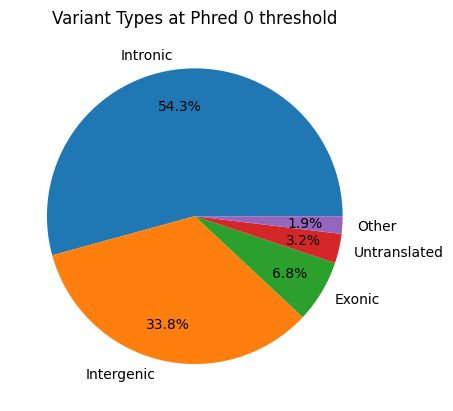

In [95]:
import matplotlib.pyplot as plt

labels = ["Intronic", "Intergenic", "Exonic", "Untranslated", "Other"]

phred0 = [113437, 70612, 14316, 6702, 1818+2134+61]
phred30 = [102287, 61157, 13780, 6160, 1597+1879+55]
phred50 = [79975, 41636, 13227, 5253, 1186+1376+52]

intronic = [113437, 102287, 79975]
intergenic = [70612, 61157, 41636]
untranslated = [6702, 6160, 5253]
downstream = [1818, 1597, 1186]
upstream = [2134, 1879, 1376]
splicing = [61, 55, 52]
exonic = [14316, 13780, 13227]

fig, ax = plt.subplots()

ax.set_title("Variant Types at Phred 0 threshold")
ax.pie(phred0, labels=labels, autopct='%1.1f%%', pctdistance=0.75)
#ax.pie(phred30, labels=labels, autopct='%1.1f%%', pctdistance=0.75)
#ax.pie(phred50, labels=labels, autopct='%1.1f%%', pctdistance=0.75)

plt.show()



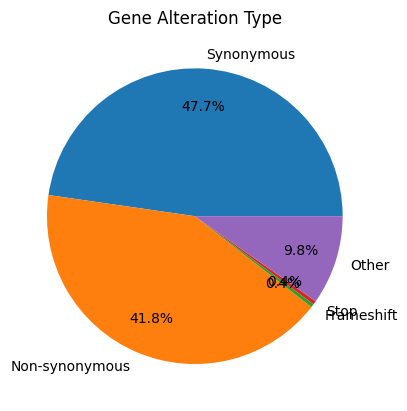

In [2]:
import matplotlib.pyplot as plt

labels = ["Synonymous", "Non-synonymous", "Frameshift", "Stop", "Other"]

exonic = [6060, 5303, 47, 52, 12701-6060-5303-47-52]

fig, ax = plt.subplots()

ax.set_title("Gene Alteration Type")
ax.pie(exonic, labels=labels, autopct='%1.1f%%', pctdistance=0.75)

plt.show()

[[1.         0.80824654]
 [0.80824654 1.        ]]


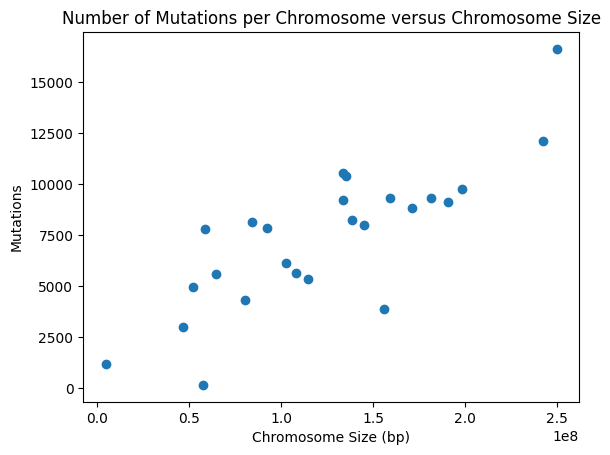

In [101]:
import matplotlib.pyplot as plt
import numpy

observed = [16616, 12132, 9760, 9120, 9300, 8831, 9341, 7980, 8236, 10555, 10390, 9202, 5368, 5659, 6124, 7850, 8127, 4329, 7787, 5621, 3023, 4957, 3876, 170, 1215]

size = [249698942, 242508799, 198450956, 190424264, 181630948, 170805979, 159345973, 145138636, 138688728, 133797422, 135186938, 133275309, 114364328, 108136338, 102439437, 92211104, 83836422, 80373285, 58617616, 64444167, 46709983, 51857516, 156040895, 57264655, 4485509]

r = numpy.corrcoef(size, observed)
print(r)

b, a = numpy.polyfit(size, observed, deg=1)

plt.title("Number of Mutations per Chromosome versus Chromosome Size")
plt.xlabel("Chromosome Size (bp)")
plt.ylabel("Mutations")

plt.scatter(x=size, y=observed)

#plt.plot(size, [a + b * i for i in size], lw=0.5);

plt.show()


[[1.         0.80396152]
 [0.80396152 1.        ]]


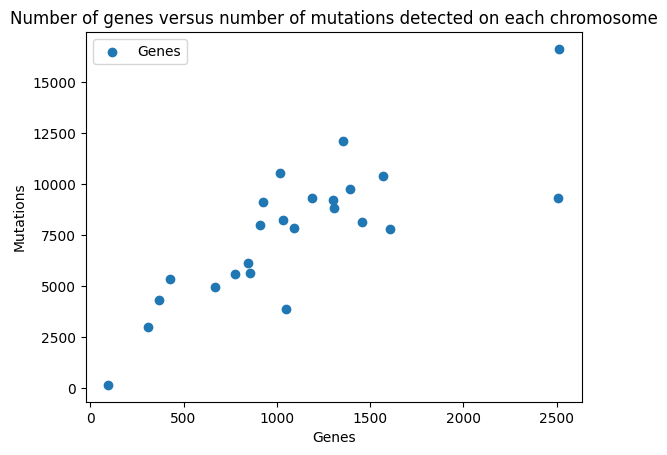

In [117]:
import matplotlib.pyplot as plt

observed = [16616, 12132, 9760, 9120, 9300, 8831, 9341, 7980, 8236, 10555, 10390, 9202, 5368, 5659, 6124, 7850, 8127, 4329, 7787, 5621, 3023, 4957, 3876, 170]

genes = [2514, 1354, 1394, 926, 1186, 1306, 2508, 908, 1033, 1017, 1567, 1299, 426, 854, 843, 1093, 1459, 367, 1609, 775, 309, 671, 1048, 98]
exons = [22345, 12506, 13517, 8299, 9946, 11406, 23045, 7823, 8941, 10273, 12459, 12399, 3784, 6837, 8106, 9986, 13179, 3333, 12169, 6492, 2539, 5173, 8568, 660]
introns = [19831, 11152, 12123, 7373, 8760, 10100, 20537, 6915, 7908, 9256, 10892, 11100, 3358, 6106, 7263, 8893, 11720, 2966, 10560, 5717, 2230, 4502, 7520, 562]

r = numpy.corrcoef(genes, observed)
print(r)

b, a = numpy.polyfit(genes, observed, deg=1)

plt.title("Number of genes versus number of mutations detected on each chromosome")
plt.xlabel("Genes")
plt.ylabel("Mutations")
plt.scatter(x=genes, y=observed, label="Genes")
plt.legend()

[[1.         0.82119526]
 [0.82119526 1.        ]]
[[1.        0.8219488]
 [0.8219488 1.       ]]


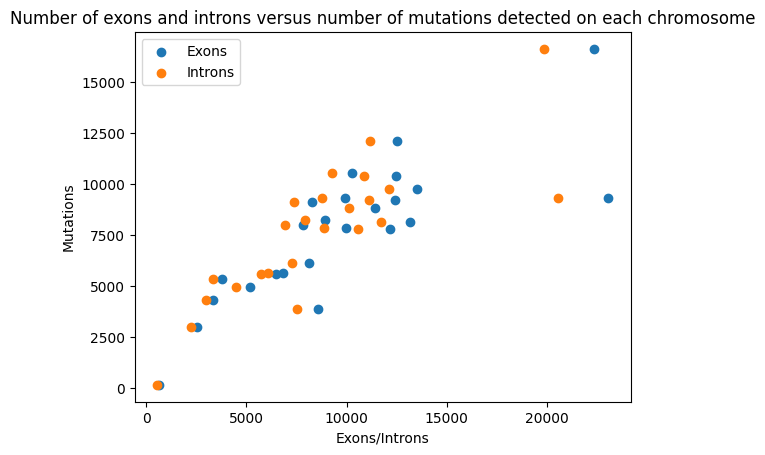

In [120]:
import matplotlib.pyplot as plt

observed = [16616, 12132, 9760, 9120, 9300, 8831, 9341, 7980, 8236, 10555, 10390, 9202, 5368, 5659, 6124, 7850, 8127, 4329, 7787, 5621, 3023, 4957, 3876, 170]

genes = [2514, 1354, 1394, 926, 1186, 1306, 2508, 908, 1033, 1017, 1567, 1299, 426, 854, 843, 1093, 1459, 367, 1609, 775, 309, 671, 1048, 98]
exons = [22345, 12506, 13517, 8299, 9946, 11406, 23045, 7823, 8941, 10273, 12459, 12399, 3784, 6837, 8106, 9986, 13179, 3333, 12169, 6492, 2539, 5173, 8568, 660]
introns = [19831, 11152, 12123, 7373, 8760, 10100, 20537, 6915, 7908, 9256, 10892, 11100, 3358, 6106, 7263, 8893, 11720, 2966, 10560, 5717, 2230, 4502, 7520, 562]

print(numpy.corrcoef(exons, observed))
print(numpy.corrcoef(introns, observed))

b, a = numpy.polyfit(genes, observed, deg=1)

plt.title("Number of exons and introns versus number of mutations detected on each chromosome")
plt.xlabel("Exons/Introns")
plt.ylabel("Mutations")
plt.scatter(x=exons, y=observed, label="Exons")
plt.scatter(x=introns, y=observed, label="Introns")
plt.legend()